## Classififcation of Variety of Vineyard

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

wine_cls = pd.read_csv(r'C:\Users\pc\Desktop\mydataanalysis\python\jupyterNotebook\instruction\wine.csv')
wine_cls.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
161,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680,2
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,2
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425,2
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,2
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,0
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,2
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,2
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510,2
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570,2


In [2]:
wine_cls.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

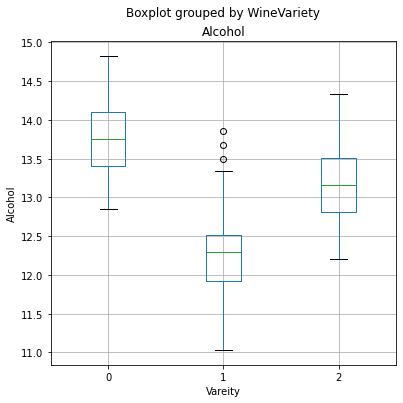

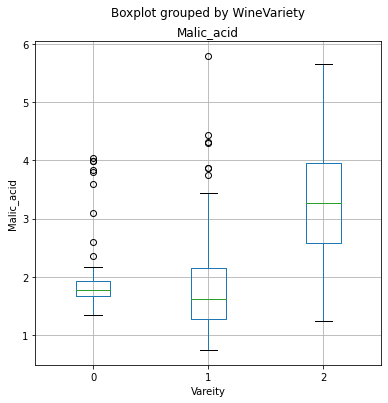

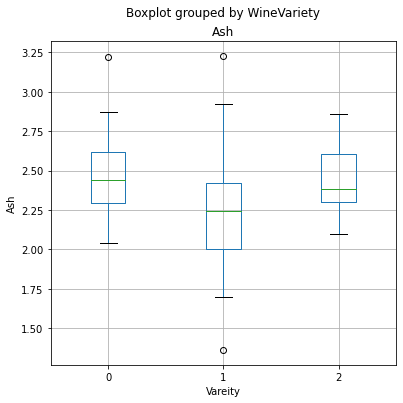

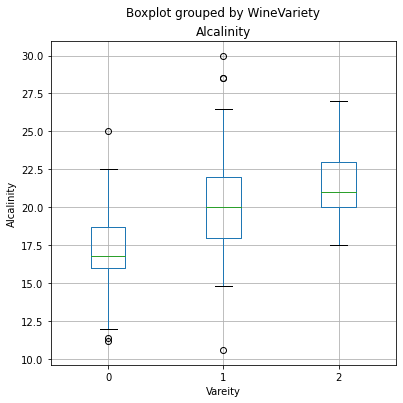

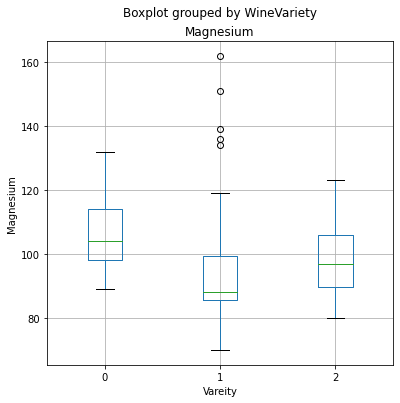

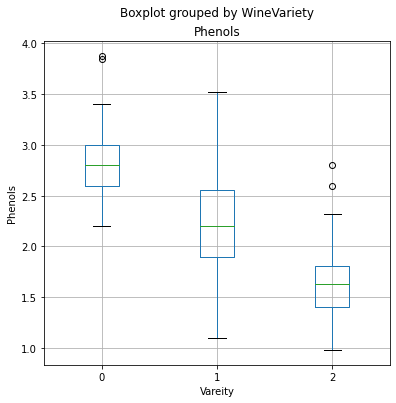

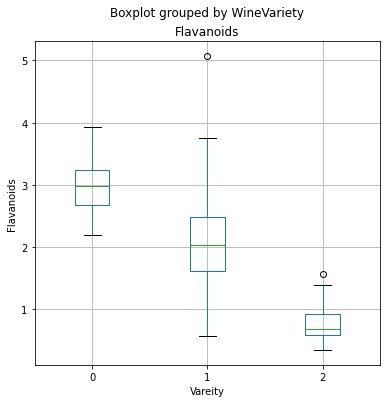

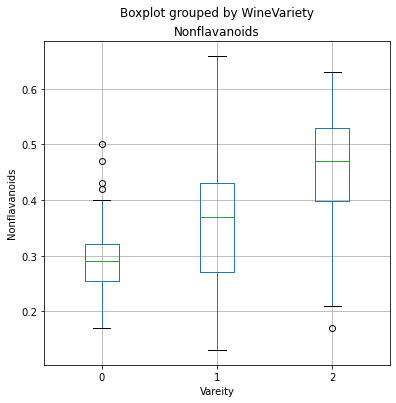

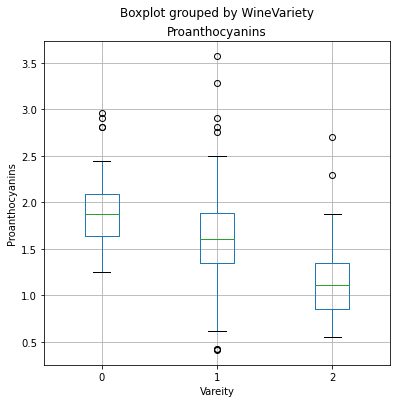

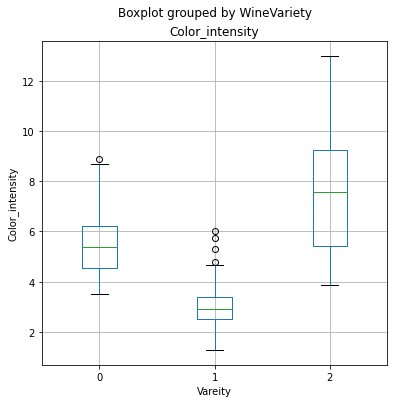

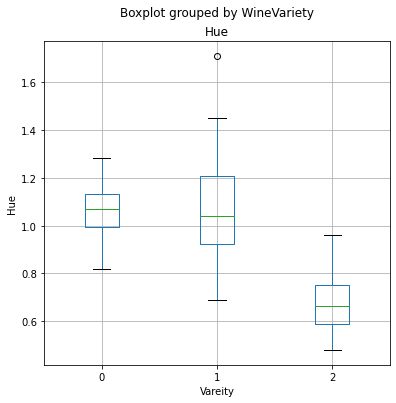

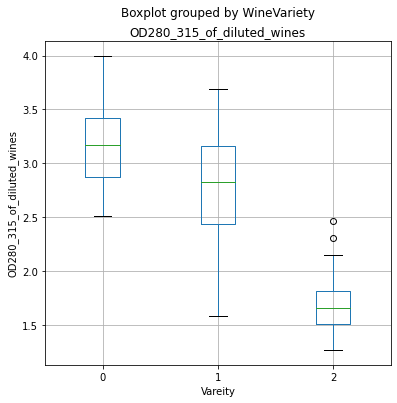

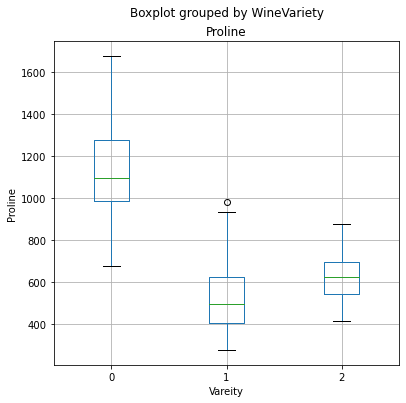

In [3]:
# showing correlation
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
for col in features:
    wine_cls.boxplot(column=col, by=label, figsize=(6,6))
    plt.xlabel('Vareity')
    plt.ylabel(col)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
# creating model
x_variety, y_variety = wine_cls[features].values, wine_cls[label].values
x_variety_train,x_variety_test,y_variety_train,y_variety_test = train_test_split(x_variety,y_variety,test_size=0.30, 
                                                                                random_state=0,
                                                                                stratify=y_variety)
print('Train: %d \n Test %d' % (x_variety_train.shape[0], x_variety_test.shape[0]))

Train: 124 
 Test 54


In [6]:
reg = 0.1
multi_model = LogisticRegression(C=1/reg, solver='lbfgs',multi_class='auto', max_iter=9000).fit(x_variety_train,y_variety_train)

In [7]:
# prediction
wine_prediction = multi_model.predict(x_variety_test)
print('Prediction: {}'.format(wine_prediction[:10]))
print(' Actual:   ', y_variety_test[:10])

Prediction: [0 1 0 0 1 2 1 2 0 2]
 Actual:    [0 1 0 0 1 2 1 2 0 2]


In [8]:
# Acuracy score
cls = classification_report(y_variety_test, wine_prediction)
print(cls)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [9]:
print('Overall acuracy ', accuracy_score(y_variety_test, wine_prediction))
print('Overall precision ', precision_score(y_variety_test, wine_prediction, average='macro'))
print('Overall recall ', recall_score(y_variety_test, wine_prediction, average='macro'))
print('Overall f1-score ', f1_score(y_variety_test, wine_prediction, average='macro'))


Overall acuracy  0.9629629629629629
Overall precision  0.9616228070175438
Overall recall  0.9682539682539683
Overall f1-score  0.9635716361522814


In [10]:
# confusion_matrix
mcm = confusion_matrix(y_variety_test,wine_prediction)
print(mcm)

[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]


Text(0, 0.5, 'actual')

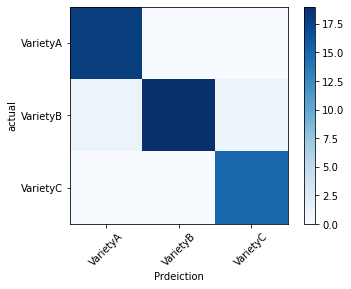

In [11]:
wine_class = ['VarietyA', 'VarietyB', 'VarietyC']
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tickmarks = np.arange(len(wine_class))
plt.xticks(tickmarks, wine_class,rotation =45)
plt.yticks(tickmarks, wine_class)
plt.xlabel('Prdeiction')
plt.ylabel('actual')

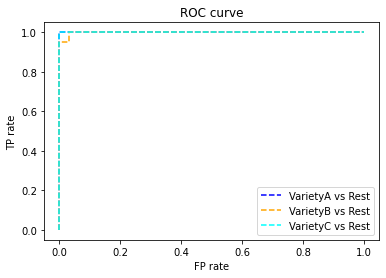

In [12]:
# probability score 
wine_score = multi_model.predict_proba(x_variety_test)
# use the above to plot roc_curve and check roc_auc_score

fpr = {}
tpr = {}
threshold = {}
for i in range(len(wine_class)):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_variety_test,wine_score[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='dashed', color='blue', label=wine_class[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dashed', color='orange', label=wine_class[1] + ' vs Rest')
plt.plot(fpr[0], tpr[2], linestyle='dashed', color='cyan', label=wine_class[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.legend(loc='best')
plt.show()

In [13]:
# improving prediction
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
features_col =  [0,1,2,3,4,5,6,7,8,9,10,11,12]
features_trans = Pipeline(steps=[('Scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', features_trans, features_col)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('reressor', LogisticRegression(C=1/reg, solver='lbfgs',multi_class='auto', max_iter=9000))])

multi_model = pipeline.fit(x_variety_train, y_variety_train) 
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('reressor', LogisticRegression(C=10.0, max_iter=9000))])


In [23]:
variety_pred = multi_model.predict(x_variety_test)
variety_prob = multi_model.predict_proba(x_variety_test)
print(f'Prediction {variety_pred[:10]}')
print(f' Actual    {y_variety_test[:10]}')

Prediction [0 1 0 0 1 2 1 2 0 2]
 Actual    [0 1 0 0 1 2 1 2 0 2]


In [24]:
cls = classification_report(y_variety_test, variety_pred)
print(cls)
print('Overall acuracy ', accuracy_score(y_variety_test, variety_pred))
print('Overall precision ', precision_score(y_variety_test, variety_pred, average='macro'))
print('Overall recall ', recall_score(y_variety_test, variety_pred, average='macro'))
print('Overall f1-score ', f1_score(y_variety_test, variety_pred, average='macro'))

mcm = confusion_matrix(y_variety_test, variety_pred)
print(mcm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Overall acuracy  1.0
Overall precision  1.0
Overall recall  1.0
Overall f1-score  1.0
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


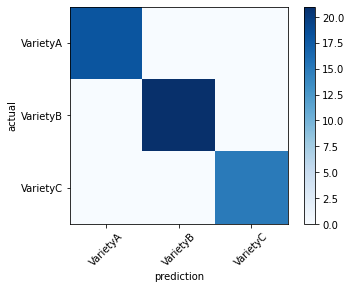

In [26]:
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tickmarks = np.arange(len(wine_class))
plt.xticks(tickmarks, wine_class, rotation=45)
plt.yticks(tickmarks, wine_class)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

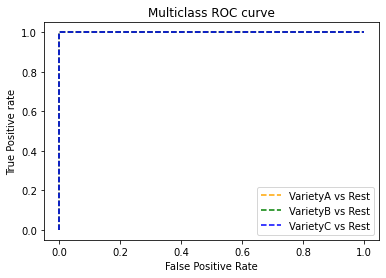

In [31]:
fpr = {}
tpr = {}
threshold = {}
for i in range(len(wine_class)):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_variety_test, variety_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_class[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_class[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_class[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()